# Mini-Capstone

## Objective

The objective of this project is to predict rain based on Australian weather data from https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package.

The output (label) is `RainTomorrow`.

## Importance

Climate change is the world's greatest challenge after catastrophic reports from the IPCC - https://www.ipcc.ch/report/ar6/wg3/.

Predicting rain is critical for the agriculture industry, especially the wine industry which is very strong in Australia.

It is also critical for controlling fires, especially after the recent bushfire crisis - https://disasterphilanthropy.org/disasters/2019-australian-wildfires/.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Read weather data

First, we are opening and reading `weatherAUS.csv` and observing columns and row data.

In [2]:
weather_data = pd.read_csv("weatherAUS.csv")

In [3]:
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Filter on location

It seems improbable that accurate weather predictions can be made for `Darwin` based on data from `Sidney`, so we need to filter on location.

In [5]:
print(weather_data['Location'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [6]:
location = "Darwin"
local_data = weather_data[weather_data["Location"] == location]
local_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


## Plot data

Plotting feature data gives a sense of patterns.

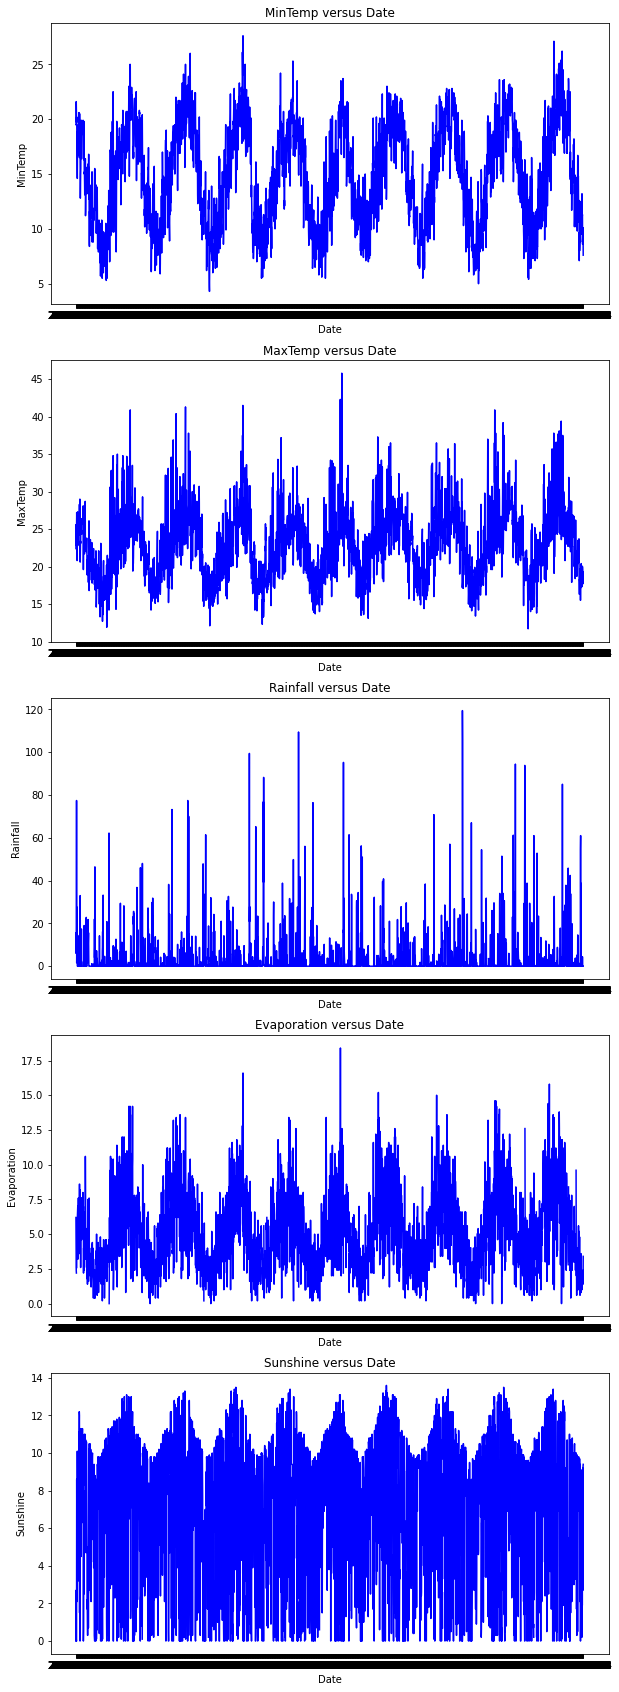

In [7]:
x_column = "Date"
features = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine"]

fig, axs = plt.subplots(len(features), figsize=(10,30))

for i, y_column in enumerate(features):
    axs[i].plot(local_data[x_column], local_data[y_column], color="blue")
    axs[i].set(title = y_column + " versus " + x_column, xlabel = x_column, ylabel = y_column)

Plotting labels shows the proportions.

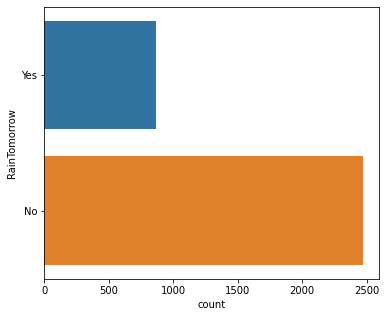

In [8]:
label = "RainTomorrow"
fig , ax = plt.subplots(figsize=(6,5))
ax = sns.countplot(y=label, data=local_data )

Correlation between features helps select a subset.

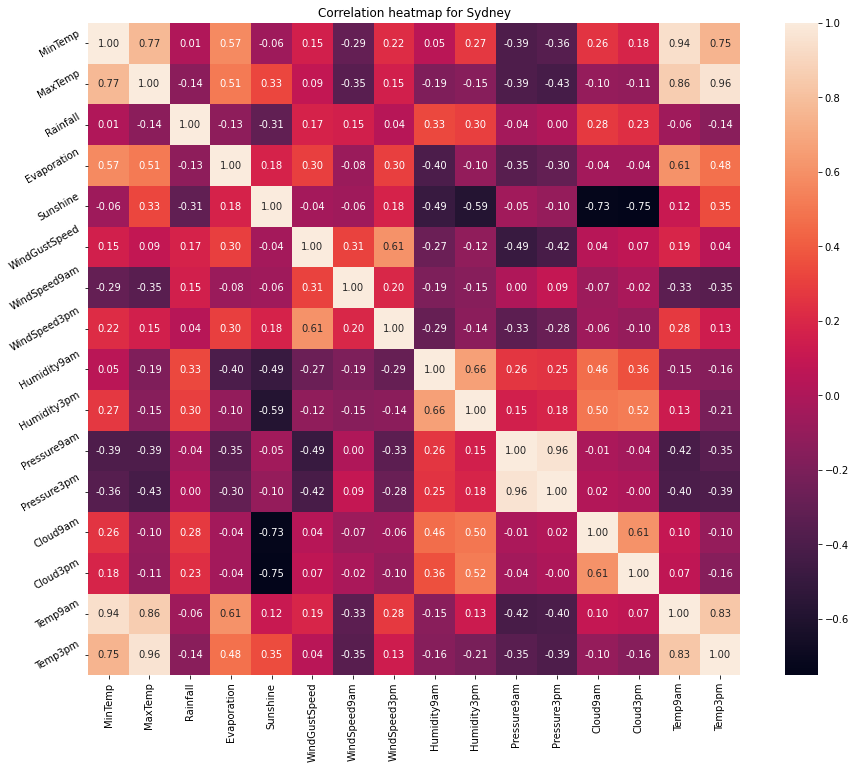

In [9]:
# Checking for correlation between the variables:
correlation = local_data.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation heatmap for ' + location)
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()


## Find and drop missing data

Let's first look at missing data.

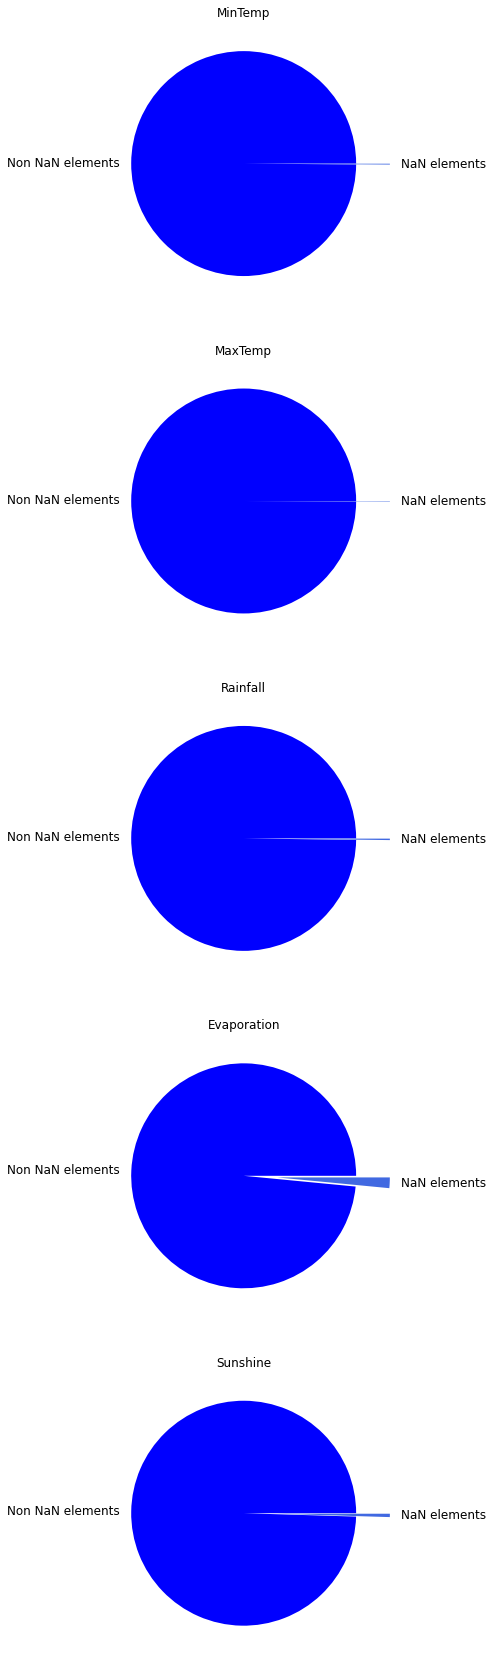

In [10]:
# explodes = (0,0.3)
# y_column = features[3]
# plt.pie(local_data[y_column].isna().value_counts(),explode=explodes,startangle=0,colors=['blue','royalblue'],
#  labels=['Non NaN elements','NaN elements'], textprops={'fontsize': 12})

default = pd.Series({ True: 0, False: 0}) # otherwise this fails for features[2] which has no NaN elements
fig, axs = plt.subplots(len(features), figsize=(10,30))
fig.set_facecolor('white')
for i, y_column in enumerate(features):
    missing = local_data[y_column].isna().value_counts().combine(default,  max, fill_value=0)
    axs[i].set_title(y_column)
    axs[i].pie(missing, explode=(0,0.3), startangle=0, colors=['blue','royalblue'],
        labels=['Non NaN elements','NaN elements'], textprops={'fontsize': 12})

Then lets drop all rows with Infinity, null or NaN values

In [11]:
print(len(local_data))
local_data = local_data.replace([np.inf, -np.inf], np.nan)
local_data = local_data.dropna(subset= features + [label])
local_data = local_data.reset_index(drop=True)
print(len(local_data))
# print(np.any(np.isnan(local_data)))
# print(np.all(np.isfinite(local_data)))

3344
3261


Check that labels are clean. We only want `Yes` or `No` values.

In [12]:
print(local_data[label].unique())

['Yes' 'No']


## Extract year, month, day

We assume here that data of any previous year can be used to predict the weather for the same day of the same month in subsequent years.

A possible improvement could involve replacing day with week number.

In [13]:
local_data = local_data.reset_index(drop=True)
local_data.Date = pd.to_datetime(local_data.Date)
# local_data.RainTomorrow = local_data.RainTomorrow == "Yes"
local_data.RainTomorrow = local_data.RainTomorrow.map({ "Yes": int(1),  "No": int(0) })
YEAR = []
MONTH = []
DAY = []
for i in range(len(local_data)):
    DAY.append(local_data.Date[i].day)
    MONTH.append(local_data.Date[i].month)
    YEAR.append(local_data.Date[i].year)
local_data['Year'] = YEAR
local_data['Month'] = MONTH
local_data['Day'] = DAY 
local_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,1017.4,8.0,8.0,20.7,20.9,Yes,1,2008,2,1
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,1016.4,7.0,7.0,22.4,24.8,Yes,1,2008,2,2
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,1015.6,7.0,8.0,23.5,23.0,Yes,1,2008,2,3
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,1011.8,8.0,8.0,21.4,20.9,Yes,1,2008,2,4
4,2008-02-06,Sydney,20.2,27.2,1.6,2.6,8.6,NaN,NaN,W,...,998.6,6.0,6.0,23.8,26.0,Yes,1,2008,2,6


## Plot one year

In [14]:
def get_timeseries(year):
    year_data = local_data[local_data.Year == year].reset_index(drop=True)
    return year_data
get_timeseries(2008).head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,1017.4,8.0,8.0,20.7,20.9,Yes,1,2008,2,1
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,1016.4,7.0,7.0,22.4,24.8,Yes,1,2008,2,2
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,1015.6,7.0,8.0,23.5,23.0,Yes,1,2008,2,3
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,1011.8,8.0,8.0,21.4,20.9,Yes,1,2008,2,4
4,2008-02-06,Sydney,20.2,27.2,1.6,2.6,8.6,NaN,NaN,W,...,998.6,6.0,6.0,23.8,26.0,Yes,1,2008,2,6


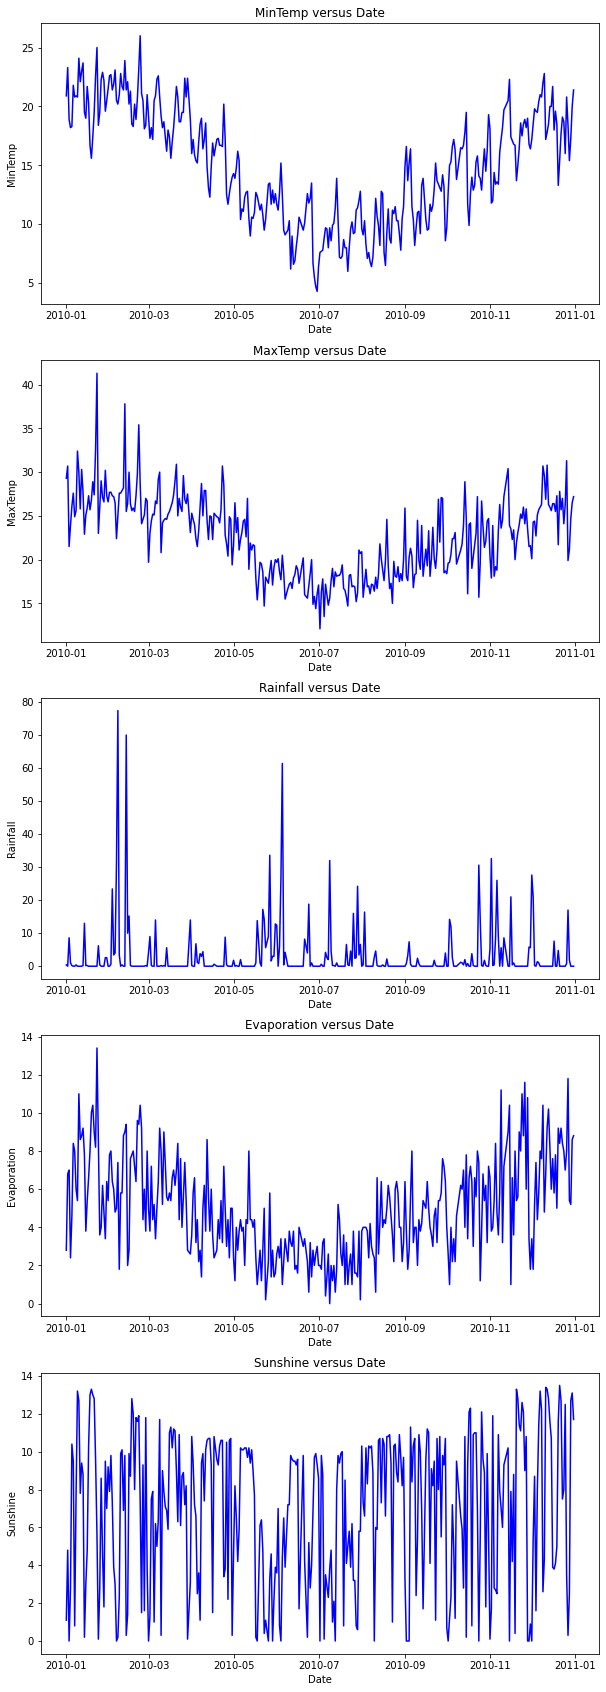

In [15]:
# plot raw data
year = 2010
year_data = get_timeseries(year)
fig, axs = plt.subplots(len(features), figsize=(10,30))

for i, y_column in enumerate(features):
    axs[i].plot(year_data[x_column], year_data[y_column], color="blue")
    axs[i].set(title = y_column + " versus " + x_column, xlabel = x_column, ylabel = y_column)

## Create training and testing data

In [16]:
# data = year_data
data = local_data.reset_index(drop = True)

In [17]:
# Create training and testing data
from sklearn.model_selection import train_test_split
X = data[["Month", "Day"] + features]
print(np.any(np.isnan(X)))
print(np.all(np.isfinite(X)))
y = data.RainTomorrow
print(np.any(np.isnan(y)))
print(np.all(np.isfinite(y)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

False
True
False
True


In [18]:
X_train.head()

,Month,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine
663,12,3,15.2,22.6,0.0,6.8,12.9
1489,5,6,10.8,21.3,0.0,4.2,10.3
1122,3,24,18.2,27.1,0.2,8.6,10.8
982,11,1,18.1,20.4,5.2,6.6,0.1
951,9,29,13.2,18.5,0.0,7.2,9.3


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow, dtype: int64

## Train and test neural network with MLPClassifier

First we try various options:

In [20]:
# Set random seed
np.random.seed(0)

# Train neural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

# Define cross validatation function (and ignore convergence warnings)
@ignore_warnings(category=ConvergenceWarning)
def cross_validate_alpha(alphas,layers,activations,X_train, y_train):
  # For each alpha being tested, perform cross validation
  for alpha in alphas:
    for layer in layers:
      for activation in activations:    
        NN_model_classify = MLPClassifier(alpha=alpha, hidden_layer_sizes=layer, activation=activation, max_iter=50, random_state=42)
        # Apply cross validation to compute 4 scores (one for each held out portion of the training set)
        score = cross_val_score(NN_model_classify, X_train, y_train, cv=4)
        # Report average score
        print("With alpha = %s, layers = %s, and activation =%s, average cross validation score of %s" % (alpha, str(layer), activation, np.mean(score)))

# Feel free to add addition values to any of these lists to test
alphas = [0.0,0.1,0.5,]
layers = [(8,9,4),(7,6,7),(3,2),(5,4)]
activations = ['logistic', 'relu']

cross_validate_alpha(alphas,layers,activations,X_train,y_train)

With alpha = 0.0, layers = (8, 9, 4), and activation =logistic, average cross validation score of 0.7434815950920246
With alpha = 0.0, layers = (8, 9, 4), and activation =relu, average cross validation score of 0.7979294478527608
With alpha = 0.0, layers = (7, 6, 7), and activation =logistic, average cross validation score of 0.7434815950920246
With alpha = 0.0, layers = (7, 6, 7), and activation =relu, average cross validation score of 0.8128834355828221
With alpha = 0.0, layers = (3, 2), and activation =logistic, average cross validation score of 0.7998466257668712
With alpha = 0.0, layers = (3, 2), and activation =relu, average cross validation score of 0.7894938650306749
With alpha = 0.0, layers = (5, 4), and activation =logistic, average cross validation score of 0.7434815950920246
With alpha = 0.0, layers = (5, 4), and activation =relu, average cross validation score of 0.776840490797546
With alpha = 0.1, layers = (8, 9, 4), and activation =logistic, average cross validation scor

Best MLPClassifier options are:
- alpha=0.1/0.5
- hidden_layer_sizes=(7, 6, 7)
- activation='relu'

In [21]:
NN_model_classify = MLPClassifier(alpha=0.5, hidden_layer_sizes=(7, 6, 7), activation='relu', max_iter=500, random_state = 0)
NN_model_classify.fit(X_train, y_train)

MLPClassifier(alpha=0.5, hidden_layer_sizes=(7, 6, 7), max_iter=500,
              random_state=0)

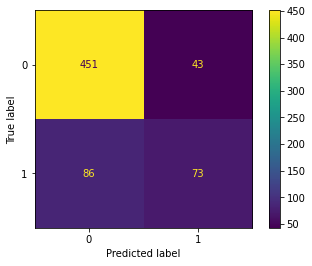

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize predictions vs. true values for test set
ConfusionMatrixDisplay.from_estimator(NN_model_classify, X_test, y_test)
plt.show()

In [23]:
from sklearn.metrics import classification_report

# Make digit predictions on test set
y_pred = NN_model_classify.predict(X_test)
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       494
           1       0.63      0.46      0.53       159

    accuracy                           0.80       653
   macro avg       0.73      0.69      0.70       653
weighted avg       0.79      0.80      0.79       653



## Train and test neural network with DecisionTreeClassifier

In [24]:
# Train neural network
from sklearn.tree import DecisionTreeClassifier
NN_model_decision = DecisionTreeClassifier(max_depth=20, criterion='entropy', random_state=0)
NN_model_decision.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)

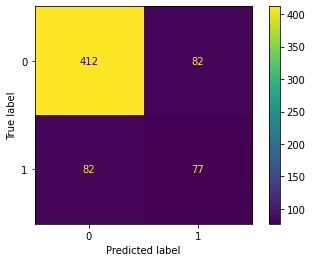

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize predictions vs. true values for test set
ConfusionMatrixDisplay.from_estimator(NN_model_decision, X_test, y_test)
plt.show()

In [26]:
# Make digit predictions on test set
y_pred = NN_model_decision.predict(X_test)
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       494
           1       0.48      0.48      0.48       159

    accuracy                           0.75       653
   macro avg       0.66      0.66      0.66       653
weighted avg       0.75      0.75      0.75       653



## Train and test neural network with RandomForestClassifier

In [27]:
# Train neural network
from sklearn.ensemble import RandomForestClassifier
NN_model_forest = RandomForestClassifier(max_depth=20, n_estimators=1400, criterion='entropy', random_state=0)
NN_model_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=1400,
                       random_state=0)

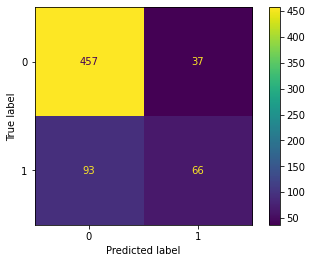

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize predictions vs. true values for test set
ConfusionMatrixDisplay.from_estimator(NN_model_forest, X_test, y_test)
plt.show()

In [29]:
# Make digit predictions on test set
y_pred = NN_model_forest.predict(X_test)
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       494
           1       0.64      0.42      0.50       159

    accuracy                           0.80       653
   macro avg       0.74      0.67      0.69       653
weighted avg       0.78      0.80      0.78       653



## Conclusion

The `MLPClassifier` and `RandomForestClassifier` perform comparably and better than the `DecisionTreeClassifier`.

`RainTomorrow` predictions of 0 (or `No`) perform significantly better that predictions of 1 (or `Yes`), probably for lack of `Yes` data samples.

There is room for improvement by working on the selection of features.